In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'analisis-sentimen-terkait-intensif-mobil-listrik:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3598426%2F6260824%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240317%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240317T083118Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D51ef1fa1bc7597b8125e270b4d727bad8d34c7c4751378d73a3bf78c93022a7e944ecdca622fb7db0c90e5a18e63e69bb3f7930d36a0a2b98fa91fda155a8d7d6db0e729ef51d17ee4ea06495c4192f50ef549c104dfcc0744c9eecf8c5afee6ac9de268347fa0581c30317653f2639868c87b712709fd840c200f8fcc9a7cd849b1698e1dc525fc444a327158b7c99eda2b3d1fecc64e4e271c554047430cfa5b674887af1d03d69d81a6f0972e1a1d0be070af15d754b395812e686226b84466d431a29faac6a4083680be88469764a09ff2b119ef3687ef38790f4598292b06c40966409c877b14eb0766c3ab117f0ff425c3489a6af1dd4323adb71976a0'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 109555 bytes downloaded
Downloaded and uncompressed: analisis-sentimen-terkait-intensif-mobil-listrik
Data source import complete.


# Import Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/analisis-sentimen-terkait-intensif-mobil-listrik/mobil_listrik.csv")

In [4]:
df.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


# Visualisasi

### Pie Chart

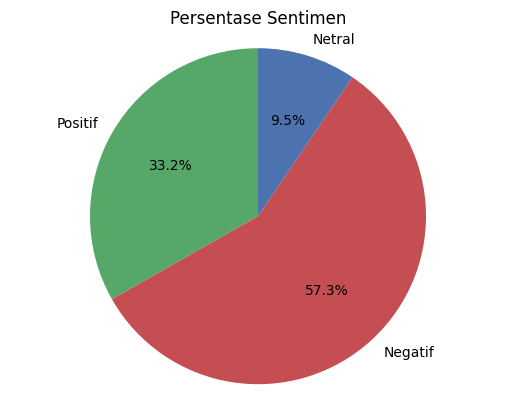

In [5]:
positif_count = df[df['sentimen'] == 'positif'].shape[0]
negatif_count = df[df['sentimen'] == 'negatif'].shape[0]
netral_count = df[df['sentimen'] == 'netral'].shape[0]

sentimen = [positif_count, negatif_count, netral_count]
labels = ['Positif', 'Negatif', 'Netral']

colors = ['#55a868', '#c44e52', '#4c72b0']

plt.pie(sentimen, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Persentase Sentimen')

plt.axis('equal')
plt.show()

### Wordcloud

In [6]:
from wordcloud import WordCloud

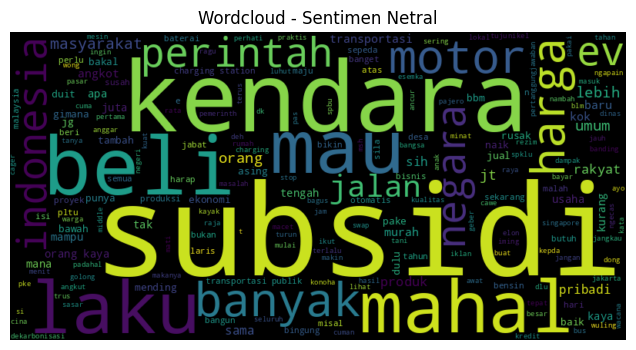

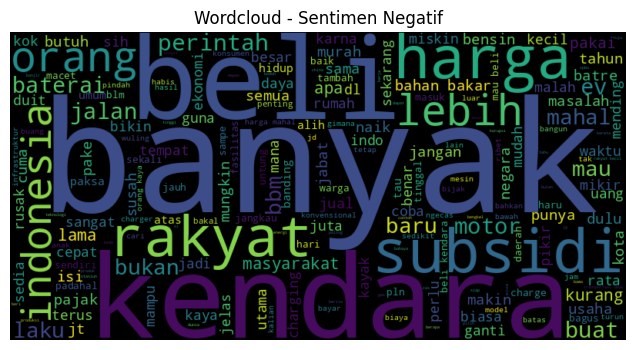

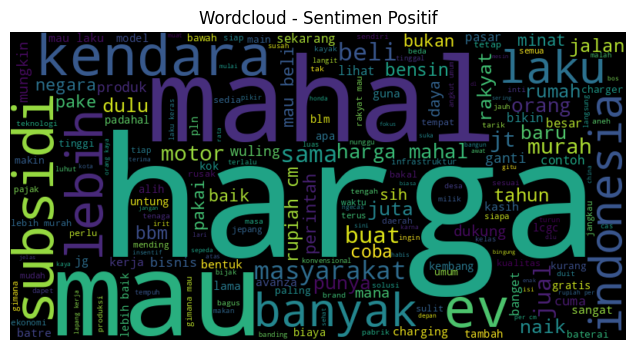

In [7]:
df['text_cleaning'] = df['text_cleaning'].fillna('')

df_neutral = df[df['sentimen'] == 'netral']
df_negative = df[df['sentimen'] == 'negatif']
df_positive = df[df['sentimen'] == 'positif']

text_neutral = ' '.join(df_neutral['text_cleaning'])
text_negative = ' '.join(df_negative['text_cleaning'])
text_positive = ' '.join(df_positive['text_cleaning'])

wordcloud_neutral = WordCloud(width=800, height=400).generate(text_neutral)
wordcloud_negative = WordCloud(width=800, height=400).generate(text_negative)
wordcloud_positive = WordCloud(width=800, height=400).generate(text_positive)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Wordcloud - Sentimen Netral')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Wordcloud - Sentimen Negatif')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Wordcloud - Sentimen Positif')
plt.axis('off')
plt.show()

# Menyiapkan Data

In [8]:
COL = 'text_cleaning'

In [9]:
print(COL)
df.shape

text_cleaning


(1517, 5)

In [10]:
df.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [11]:
# Membuat mapping untuk encoding
sentimen_mapping = {"negatif": -1, "netral": 0, "positif": 1}

# Melakukan encoding pada kolom "sentimen"
df["sentimen_encoded"] = df["sentimen"].map(sentimen_mapping)

# TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf = TfidfVectorizer(min_df=3, max_df=0.5, ngram_range=(1, 1))
features = tfidf.fit_transform(df[COL].values)
dfuni = pd.DataFrame(features.todense(), columns=tfidf.get_feature_names_out())

In [14]:
print(dfuni.shape)

(1517, 1180)


In [15]:
dfuni.head()

,abis,ac,ada,adil,agya,ahli,air,airev,ajah,ajar,...,worth,woy,wuling,xenia,xpander,yah,yakin,yamaha,yo,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.227734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split Data

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree, metrics
from sklearn.metrics import classification_report

In [17]:
dfuni['y'] = df['sentimen_encoded']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(dfuni.drop(['y'], axis=1), dfuni[['y']], test_size=0.30, random_state=555)

Pada proses ini akan digunakan library sklearn.model_selection dengan modul train_test _split untuk membagi data latih (X_train dan y_train) dan data uji (X_test dan y_test) dengan persentasi data latih 70% dan data uji 30% serta memilih label data yaitu yang merupakan variable independen dari data yaitu kolom sentimen untuk dijadikan parameter klasifikasi prediksi.

In [19]:
dfunitrain = X_train.join(y_train)
dfunitest = X_test.join(y_test)

In [20]:
X_unitrain = dfunitrain.drop(['y'], axis=1)
y_unitrain = dfunitrain['y']
X_unitest = dfunitest.drop(['y'], axis=1)
y_unitest = dfunitest['y']

# SVM

In [21]:
from sklearn import svm

In [22]:
clf = svm.SVC(max_iter=-1,
            C=1000,
#             gamma=0.01,
            kernel='rbf')
# clf = svm.NuSVC(kernel='poly')
clf.fit(X_unitrain, y_unitrain.values.ravel())
y_unipred = clf.predict(X_unitest)
print(clf.score(X_unitest, y_unitest))
print(metrics.classification_report(y_unitest, y_unipred, digits=3))

0.7807017543859649
              precision    recall  f1-score   support

          -1      0.779     0.946     0.854       257
           0      0.556     0.106     0.179        47
           1      0.800     0.711     0.753       152

    accuracy                          0.781       456
   macro avg      0.711     0.587     0.595       456
weighted avg      0.763     0.781     0.751       456



Berdasarkan output tersebut, model SVM memiliki akurasi prediksi sebesar 78% untuk kasus "Analisis Sentimen Terkait Intensif Mobil Listrik" menggunakan data komentar pada platform Youtube